# Lab 05: Multivariate and Hierarchical Visualization

**Objectives**

- Understand and create multivariate plots (scatter, pairwise scatter matrix, bubble charts, correlograms).
- Build hierarchical visualizations like treemaps.
- Introduce interactive plotting with Plotly: pie charts, interactive scatter plots, and interactive treemaps.

**Datasets Used**: Iris, Tips

## Import Libraries and Load Dataset

In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [49]:
iris = sns.load_dataset("iris")
tips = sns.load_dataset("tips")

In [50]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Scatter Plots and Bubble Charts

Multivariate visualization starts with relationships among multiple variables.

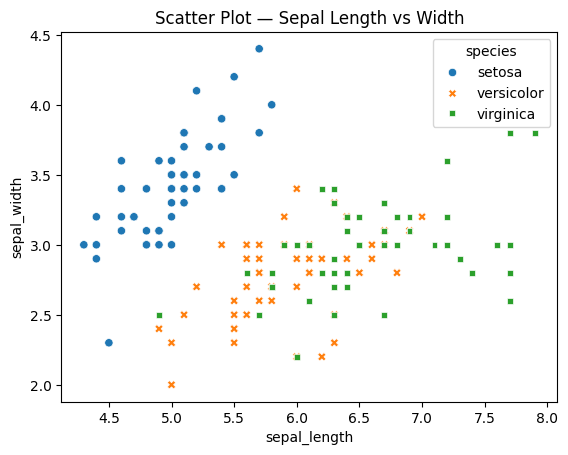

In [51]:
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species", style="species")
plt.title("Scatter Plot — Sepal Length vs Width")
plt.show()

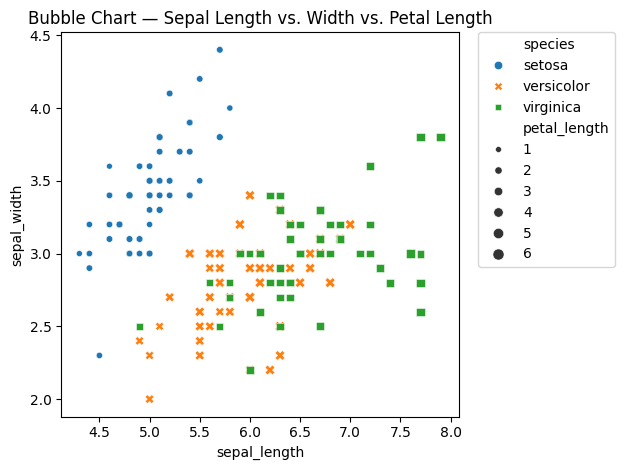

In [52]:
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species", style="species", size="petal_length")
plt.title("Bubble Chart — Sepal Length vs. Width vs. Petal Length")

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()

## Task: Create a bubble chart that visualizes how tips relate to the bill amount, while showing party size and day of week.

In [53]:
## YOUR CODE HERE

# Pair Plot

A pair plot visualizes relationships among all numeric variables.

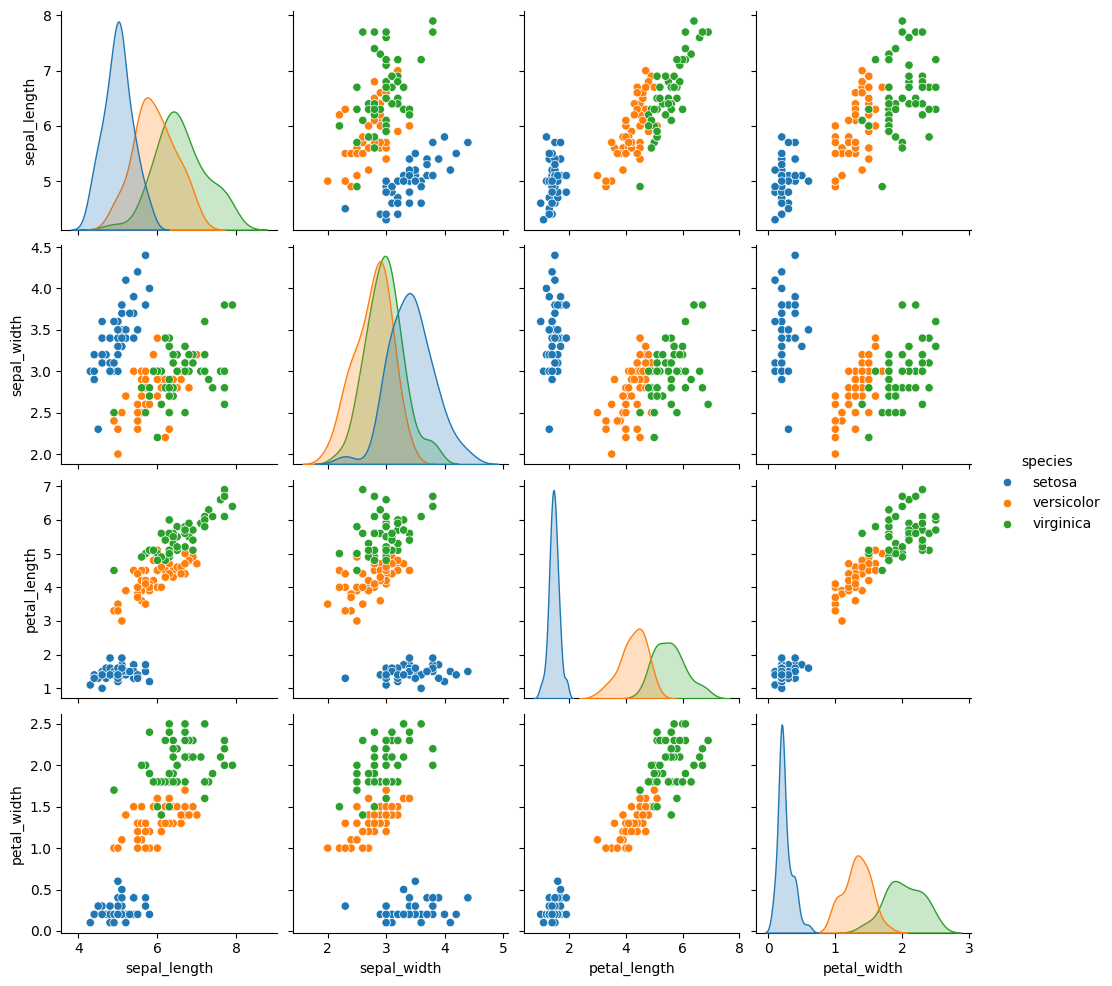

In [54]:
sns.pairplot(iris, hue="species")
plt.show()

## Task: Experiment with pair plot using a different dataset (ex. tips) or different hue variables.

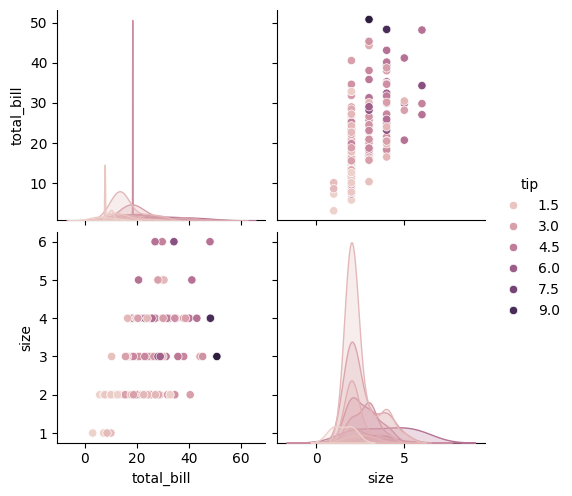

In [55]:
## YOUR CODE HERE
sns.pairplot(tips, hue="tip")
plt.show()

# Correlogram

Correlograms visualize correlations among variables.

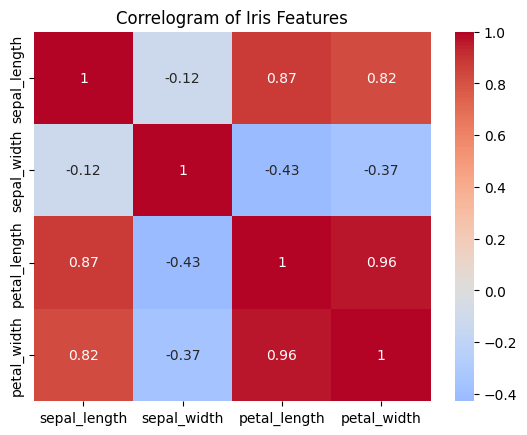

In [56]:
corr = iris.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlogram of Iris Features")
plt.show()

## Task: Use correlogram on a different dataset

In [57]:
## YOUR CODE HERE

# Hierarchical Visualization — Treemap

Treemaps show hierarchical proportions using nested rectangles.

In [58]:
fig = px.treemap(
    tips,
    path=["day", "time", "sex"],
    values="total_bill",
    color="tip",
    color_continuous_scale="Viridis",
    title="Treemap of Total Bill by Day, Time, and Sex"
)

# fig.show()
fig.write_html("plot.html", auto_open=True)

## Task: Use treemap on a different dataset and experiment with the path

In [59]:
## YOUR CODE HERE

# Interactive Plots using Plotly

In [60]:
species_counts = iris["species"].value_counts().reset_index()
species_counts.columns = ["species", "count"]

In [61]:
fig = px.pie(species_counts, names="species", values="count", title="Interactive Pie Chart — Iris Species")
# fig.show()
fig.write_html("plot2.html", auto_open=True)

In [63]:
fig = px.scatter(iris, x="sepal_length", y="petal_length", color="species",
                 size="petal_width", hover_data=["sepal_width"],
                 title="Interactive Scatter Plot — Iris Dataset")
# fig.show()
fig.write_html("plot3.html", auto_open=True)